In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Google Drive'daki dosyanın yolu
train_path = '/content/drive/MyDrive/sign-language-mnist/sign_mnist_train.csv'
test_path = '/content/drive/MyDrive/sign-language-mnist/sign_mnist_test.csv'

# Verileri okuma
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [ ]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


from matplotlib import pyplot as plt
_df_0['pixel1'].plot(kind='hist', bins=20, title='pixel1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pixel2'].plot(kind='hist', bins=20, title='pixel2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pixel3'].plot(kind='hist', bins=20, title='pixel3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pixel4'].plot(kind='hist', bins=20, title='pixel4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='pixel1', y='pixel2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='pixel2', y='pixel3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pixel3', y='pixel4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pixel4', y='pixel5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['pixel1'].plot(kind='line', figsize=(8, 4), title='pixel1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pixel2'].plot(kind='line', figsize=(8, 4), title='pixel2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['pixel3'].plot(kind='line', figsize=(8, 4), title='pixel3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['pixel4'].plot(kind='line', figsize=(8, 4), title='pixel4')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [ ]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

Text(0.5, 1.0, 'label: 13  letter: M')

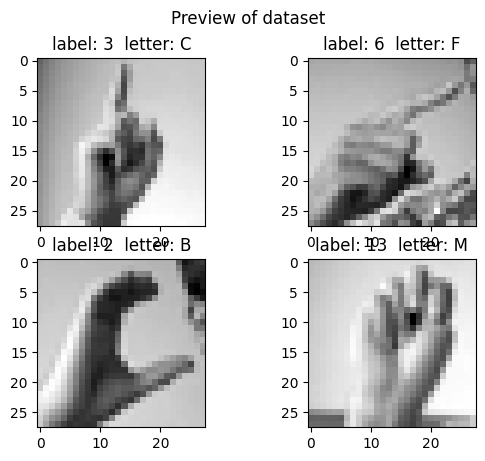

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

Text(0.5, 1.0, 'Frequency of each label')

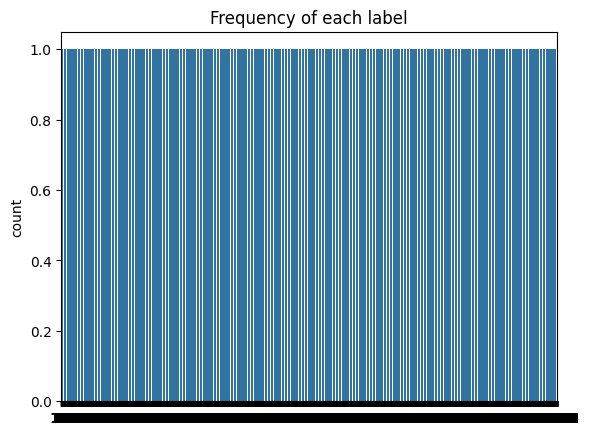

In [ ]:
sns.countplot(train_label)
plt.title("Frequency of each label")

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 125s 886ms/step - accuracy: 0.0787 - loss: 3.0897 - val_accuracy: 0.3129 - val_loss: 2.1612
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 140s 873ms/step - accuracy: 0.2784 - loss: 2.3216 - val_accuracy: 0.5376 - val_loss: 1.4481
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 119s 859ms/step - accuracy: 0.4413 - loss: 1.7406 - val_accuracy: 0.6695 - val_loss: 0.9932
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 121s 880ms/step - accuracy: 0.5586 - loss: 1.3449 - val_accuracy: 0.7033 - val_loss: 0.8562
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 145s 904ms/step - accuracy: 0.6266 - loss: 1.1373 - val_accuracy: 0.7755 - val_loss: 0.6280
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 121s 874ms/step - accuracy: 0.6919 - loss: 0.9218 - val_accuracy: 0.7963 - val_loss: 0.5658
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 119s 862ms/step - accuracy: 0.7367 - loss: 0.7998 - val_accuracy: 0.8608 - val_loss: 0.4146
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 126s 915ms/step - accuracy: 0.7647 -

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9669 - loss: 0.0733


In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 96.75125479698181%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


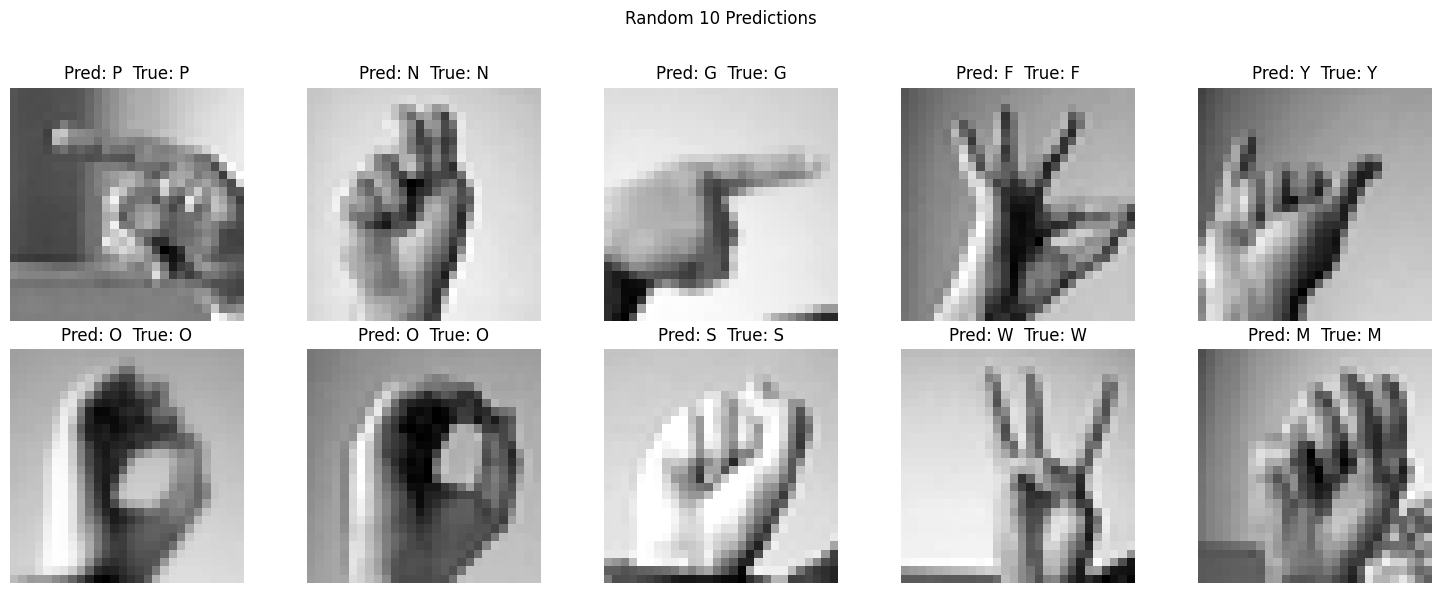

In [ ]:
import numpy as np

# İşaret dili harfleri ve etiketlerini tanımlayalım (0-25, A-Z için)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Rastgele 10 test örneği seç
random_indices = np.random.randint(0, X_test.shape[0], size=10)

# Görselleri ve tahminleri hazırlayalım
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Random 10 Predictions')

# Her bir rastgele seçilen örnek için tahmin yap
for i, idx in enumerate(random_indices):
    ax = axes[i//5, i%5]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Modelin tahmini
    prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
    predicted_label = lb.inverse_transform(prediction)

    # Gerçek etiket
    true_label = test_label.iloc[idx]

    # Tahmin edilen harf
    predicted_char = alphabet[predicted_label[0]]
    true_char = alphabet[true_label]

    # Görselin başlığı
    ax.set_title(f"Pred: {predicted_char}  True: {true_char}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step


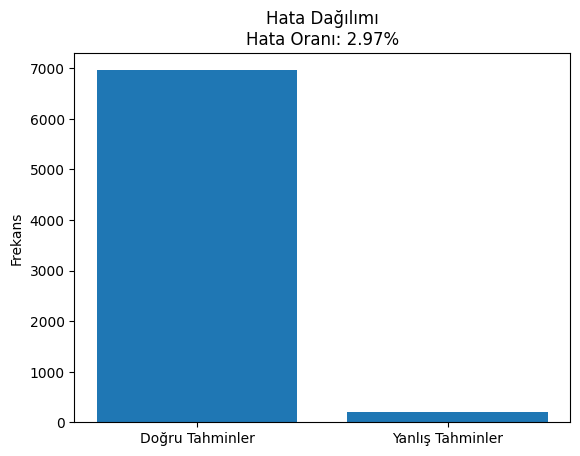

In [ ]:
# Doğru ve yanlış tahminlerin dağılımını incelemek için
y_pred = model.predict(X_test)
y_pred_labels = lb.inverse_transform(y_pred)

# Hatalı tahminlerin belirlenmesi
correct_predictions = np.sum(y_pred_labels == test_label)
incorrect_predictions = np.sum(y_pred_labels != test_label)

# Hata oranı
error_rate = incorrect_predictions / len(test_label)

# Hata oranı grafikle gösterme
plt.bar(['Doğru Tahminler', 'Yanlış Tahminler'], [correct_predictions, incorrect_predictions])
plt.title(f'Hata Dağılımı\nHata Oranı: {error_rate * 100:.2f}%')
plt.ylabel('Frekans')
plt.show()


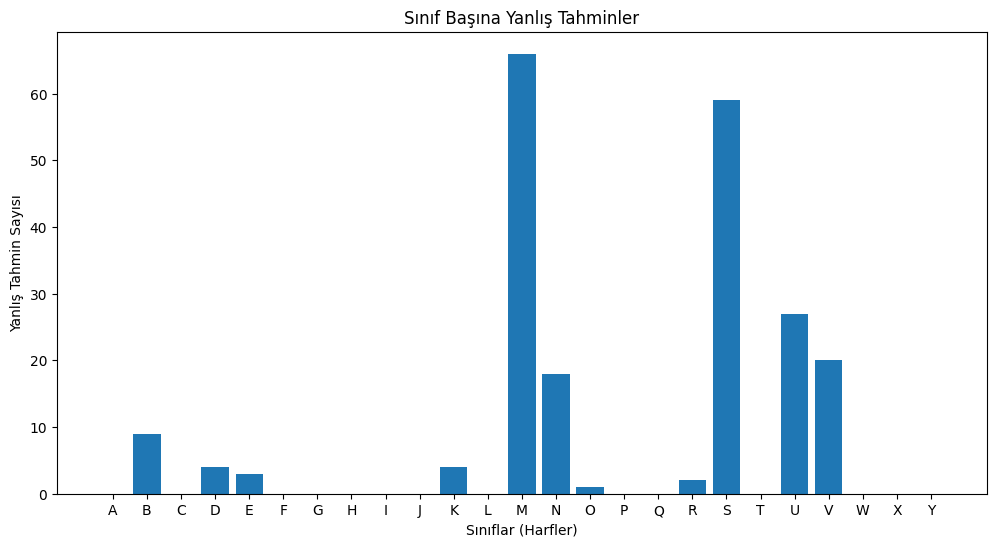

In [ ]:
# Yanlış tahminlerin sayısı
incorrect_per_class = {}
for i in range(num_classes):
    incorrect_per_class[alphabet[i]] = np.sum((test_label == i) & (y_pred_labels != i))

# Yanlış tahmin sayılarının görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.bar(incorrect_per_class.keys(), incorrect_per_class.values())
plt.title('Sınıf Başına Yanlış Tahminler')
plt.xlabel('Sınıflar (Harfler)')
plt.ylabel('Yanlış Tahmin Sayısı')
plt.show()


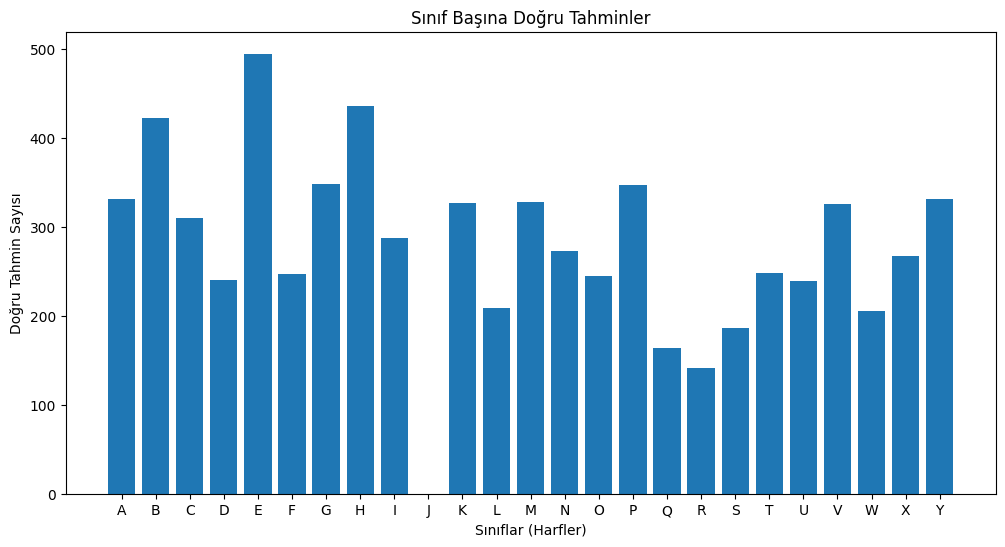

In [ ]:
# Doğru tahminlerin sayısı
correct_per_class = {}
for i in range(num_classes):  # 25 sınıf
    correct_per_class[alphabet[i]] = np.sum((test_label == i) & (y_pred_labels == i))

# Doğru tahmin sayılarının görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.bar(correct_per_class.keys(), correct_per_class.values())
plt.title('Sınıf Başına Doğru Tahminler')
plt.xlabel('Sınıflar (Harfler)')
plt.ylabel('Doğru Tahmin Sayısı')
plt.show()


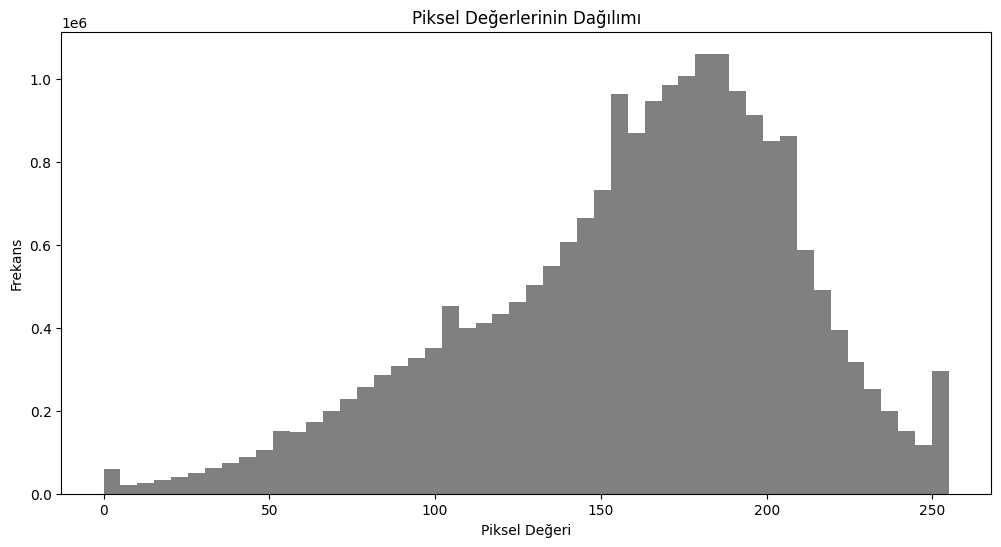

In [ ]:
# İlk görüntüdeki piksel değerlerini görselleştir
plt.figure(figsize=(12, 6))
plt.hist(X_train.flatten(), bins=50, color='gray')
plt.title('Piksel Değerlerinin Dağılımı')
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')
plt.show()


In [ ]:
from keras.layers import LSTM
from keras.layers import Reshape
# CNN katmanları ile özellik çıkarımı (Zaten var)
model = Sequential()

# CNN katmanları (özellik çıkarımı)
model.add(Conv2D(128, kernel_size=(5, 5),
                 strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                 strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                 strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

# Özellik çıkarımını yapacak ve zaman adımlarına uygun hale getirecek Flatten katmanı
model.add(Flatten())

# LSTM katmanı ekleniyor
# LSTM katmanı, sıralı verilerdeki uzun vadeli bağımlılıkları öğrenmek için kullanılır
# Burada, her görüntü "zaman adımı" olarak kabul edilir.
model.add(Reshape((1, -1)))  # CNN çıkışını sıralı hale getir
model.add(LSTM(128, activation='relu', return_sequences=False))

# Tam bağlantılı katmanlar
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24, activation='softmax'))  # 24 sınıf (A-Z)

model.summary()

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
model.fit(train_datagen.flow(X_train, y_train, batch_size=200),
          epochs=35,
          validation_data=(X_test, y_test),
          shuffle=1)

# Modelin doğruluğunu değerlendir
(ls, acc) = model.evaluate(x=X_test, y=y_test)

print('MODEL ACCURACY = {}%'.format(acc * 100))



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 32)            │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         328,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450,936 (1.72 MB)

 Trainable params: 450,936 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 129s 888ms/step - accuracy: 0.0512 - loss: 3.1603 - val_accuracy: 0.1659 - val_loss: 2.6469
Epoch 2/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 122s 882ms/step - accuracy: 0.1756 - loss: 2.6822 - val_accuracy: 0.3433 - val_loss: 1.9338
Epoch 3/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 126s 914ms/step - accuracy: 0.3006 - loss: 2.1397 - val_accuracy: 0.5190 - val_loss: 1.3635
Epoch 4/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 127s 922ms/step - accuracy: 0.4425 - loss: 1.6506 - val_accuracy: 0.5533 - val_loss: 1.2282
Epoch 5/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 125s 906ms/step - accuracy: 0.5482 - loss: 1.3145 - val_accuracy: 0.6606 - val_loss: 0.9142
Epoch 6/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 125s 906ms/step - accuracy: 0.6120 - loss: 1.1066 - val_accuracy: 0.7091 - val_loss: 0.7654
Epoch 7/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 138s 879ms/step - accuracy: 0.6687 - loss: 0.9427 - val_accuracy: 0.7510 - val_loss: 0.6870
Epoch 8/35
138/138 ━━━━━━━━━━━━━━━━━━━━ 123s 894ms/step - accuracy: 0.7131 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


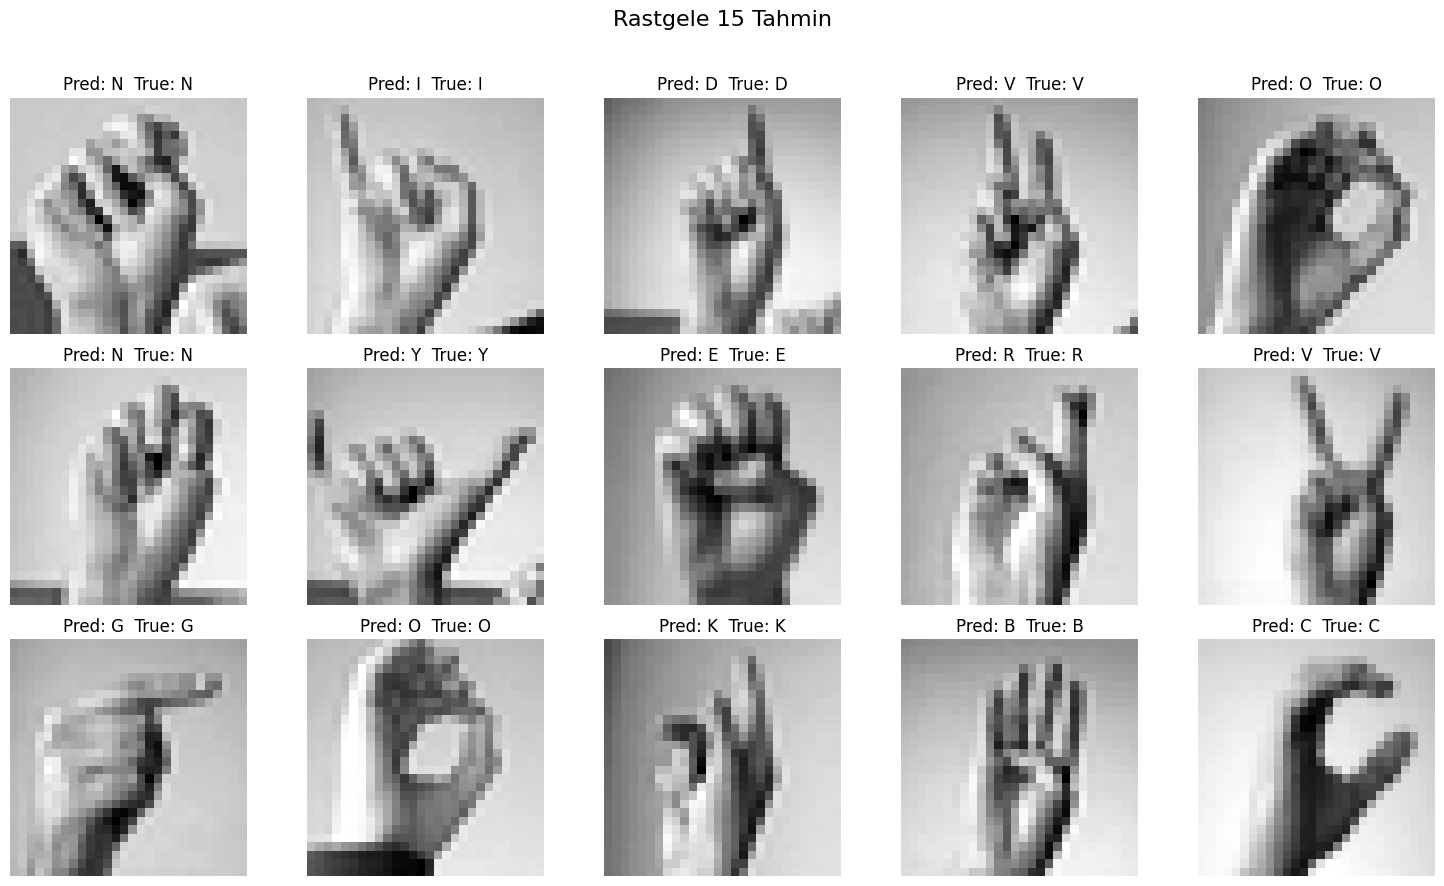

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# İşaret dili harflerini (A-Z) temsil eden bir liste
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def predict_random_images(model, X_test, y_test, lb, num_images=15):
    # Rastgele num_images sayıda test örneği seç
    random_indices = np.random.randint(0, X_test.shape[0], size=num_images)

    # Görselleri ve tahminleri hazırlayalım
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    fig.suptitle(f'Rastgele {num_images} Tahmin', fontsize=16)

    # Her bir rastgele seçilen örnek için tahmin yap
    for i, idx in enumerate(random_indices):
        ax = axes[i // 5, i % 5]  # 3x5'lik bir düzen kullan
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.axis('off')

        # Modelin tahmini
        prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
        predicted_label = lb.inverse_transform(prediction)

        # Gerçek etiket
        true_label = y_test.iloc[idx]

        # Tahmin edilen harf
        predicted_char = alphabet[predicted_label[0]]
        true_char = alphabet[true_label]

        # Görselin başlığı
        ax.set_title(f"Pred: {predicted_char}  True: {true_char}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Fonksiyonu çağır ve rastgele 15 görüntü tahmini yap
predict_random_images(model, X_test, test_label, lb, num_images=15)


225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step


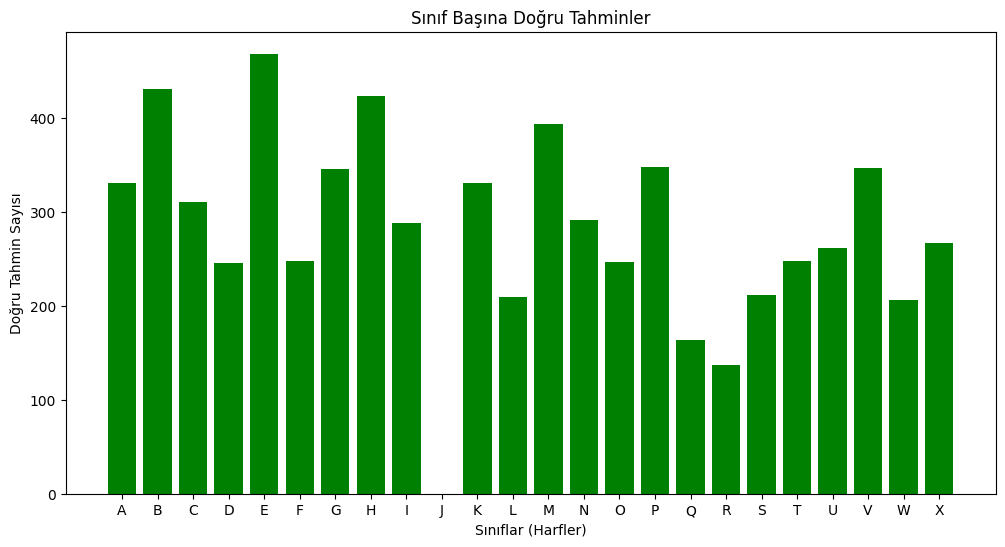

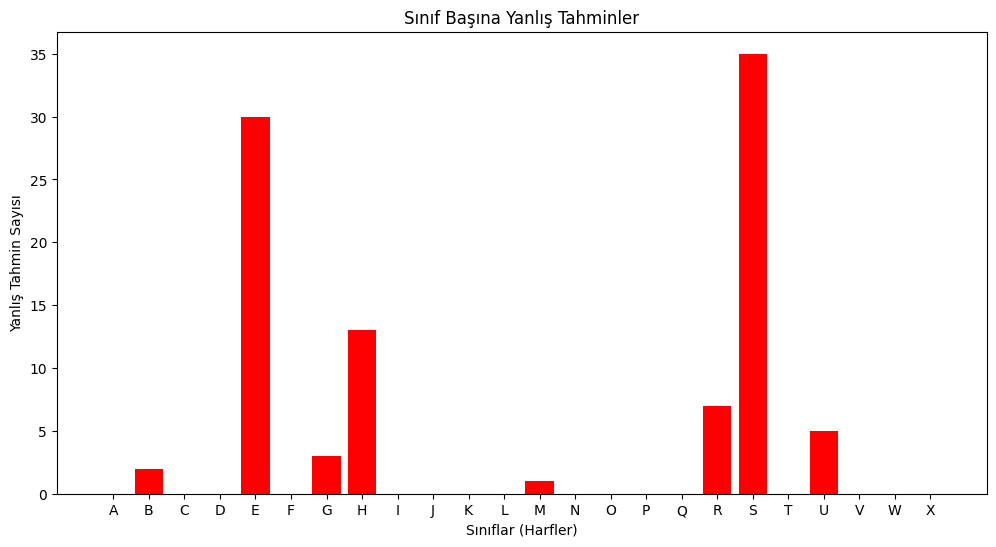

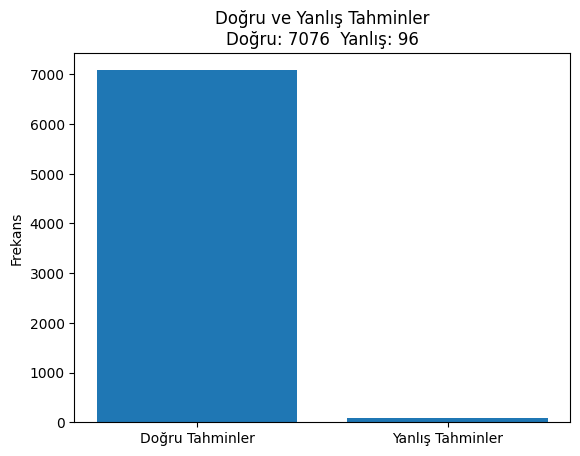

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Modelin tüm test verisi üzerinde tahmin yapması
y_pred = model.predict(X_test)
y_pred_labels = lb.inverse_transform(y_pred)

# Gerçek etiketler
y_true_labels = test_label

# Doğru ve yanlış tahminleri sayma
correct_predictions = np.sum(y_pred_labels == y_true_labels)
incorrect_predictions = np.sum(y_pred_labels != y_true_labels)

# Doğru ve yanlış tahminlerin frekansı
correct_per_class = {}
incorrect_per_class = {}

# Her bir sınıf için doğru ve yanlış tahminlerin sayısını bulalım
for i in range(24):  # 24 sınıf (A-Z)
    correct_per_class[alphabet[i]] = np.sum((y_true_labels == i) & (y_pred_labels == i))
    incorrect_per_class[alphabet[i]] = np.sum((y_true_labels == i) & (y_pred_labels != i))

# Doğru tahminlerin görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.bar(correct_per_class.keys(), correct_per_class.values(), color='green')
plt.title('Sınıf Başına Doğru Tahminler')
plt.xlabel('Sınıflar (Harfler)')
plt.ylabel('Doğru Tahmin Sayısı')
plt.show()

# Yanlış tahminlerin görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.bar(incorrect_per_class.keys(), incorrect_per_class.values(), color='red')
plt.title('Sınıf Başına Yanlış Tahminler')
plt.xlabel('Sınıflar (Harfler)')
plt.ylabel('Yanlış Tahmin Sayısı')
plt.show()

# Genel doğru ve yanlış tahminlerin dağılımı
plt.bar(['Doğru Tahminler', 'Yanlış Tahminler'], [correct_predictions, incorrect_predictions])
plt.title(f'Doğru ve Yanlış Tahminler\nDoğru: {correct_predictions}  Yanlış: {incorrect_predictions}')
plt.ylabel('Frekans')
plt.show()



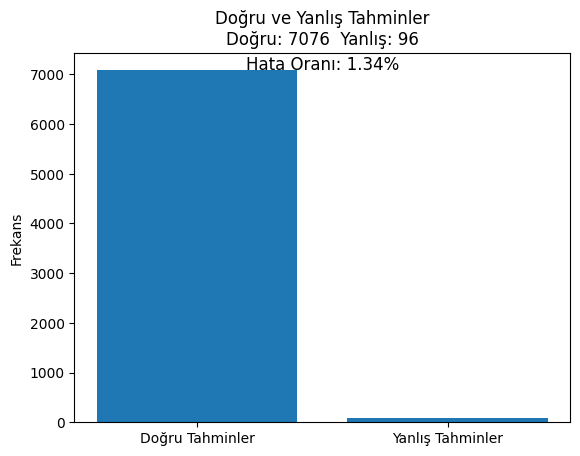

In [ ]:
# Genel doğru ve yanlış tahminlerin dağılımı
total_predictions = len(y_true_labels)  # Toplam test örneği sayısı

# Hata oranı hesaplama
error_rate = incorrect_predictions / total_predictions
accuracy = correct_predictions / total_predictions

# Grafikte hata oranını yazdırma
plt.bar(['Doğru Tahminler', 'Yanlış Tahminler'], [correct_predictions, incorrect_predictions])
plt.title(f'Doğru ve Yanlış Tahminler\nDoğru: {correct_predictions}  Yanlış: {incorrect_predictions}')
plt.ylabel('Frekans')

# Hata oranını başlığa ekleyelim
plt.text(0.5, max(correct_predictions, incorrect_predictions) * 0.99,
         f'Hata Oranı: {error_rate * 100:.2f}%',
         ha='center', va='bottom', fontsize=12, color='black')

plt.show()
